In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Local Data Load
df = pd.read_csv("../data/sales_cleaned.csv", parse_dates=["Order Date"])
df["order_month"] = df["Order Date"].dt.to_period("M").astype(str)

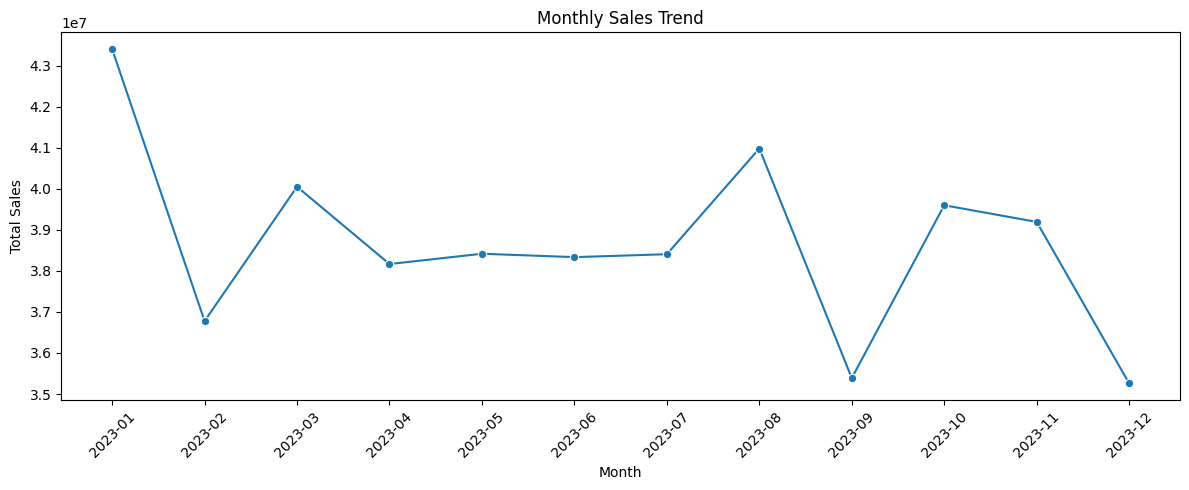

In [3]:
#Monthly Sales Trend
monthly_sales = df.groupby("order_month")["Sales"].sum()

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

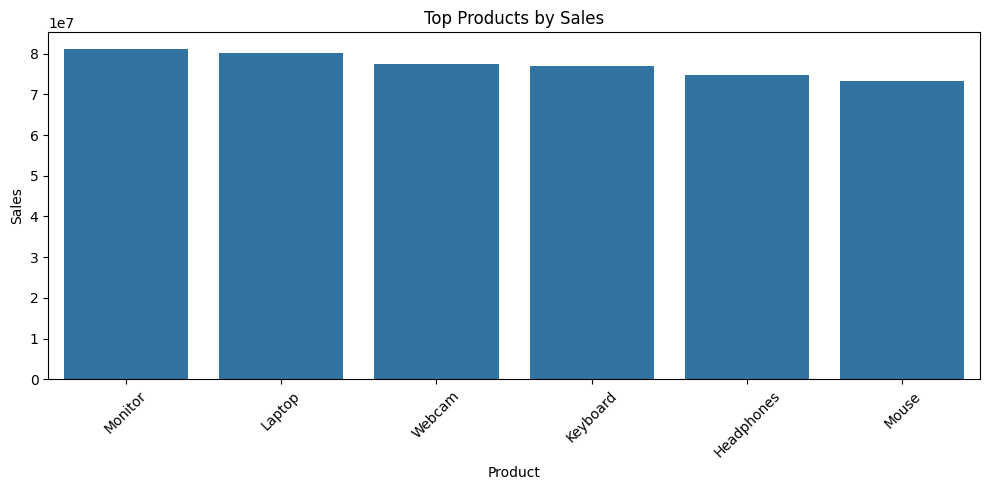

In [9]:
#Product Sales Bar Chart
product_sales = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Top Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


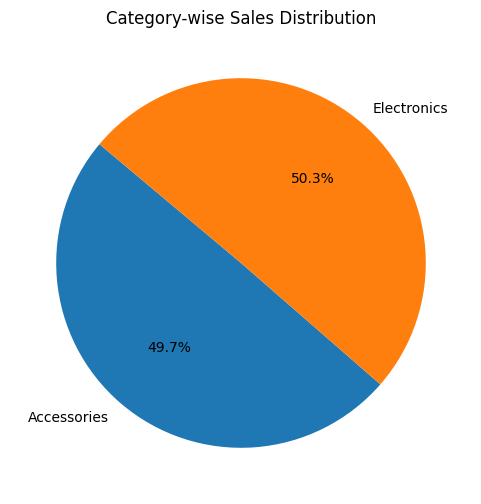

In [10]:
#Category Sales Pie Chart
category_sales = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(6,6))
plt.pie(
    category_sales.values,
    labels=category_sales.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Category-wise Sales Distribution")
plt.show()

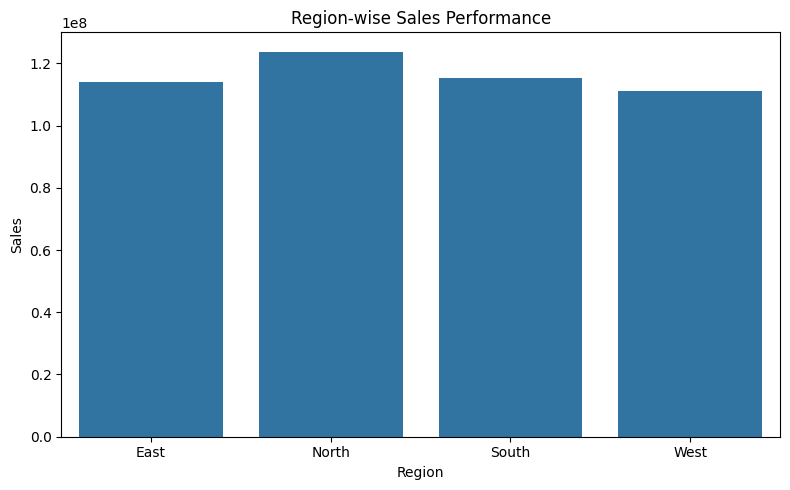

In [11]:
#Region Sales Bar Chart
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Region-wise Sales Performance")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

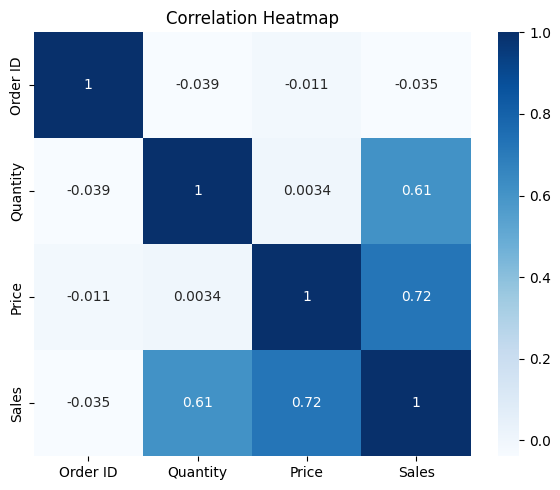

In [12]:
#Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()